<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=10>
    Data Science - HW2 <br>
<font color=2565AE size=5>
    Electrical Engineering Department <br>
    winter 2025<br>
<font color=3C99D size=5>
    Assignment 2 <br>
<font color=696880 size=4>
   Adel Movahedian 400102074

____


# <font color = "blue"> 1.Data Expolarity and imports
importing the necessary libraries and loading the dataset into a Pandas DataFrame.

In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load the Divar dataset
df = pd.read_csv('divar_posts.csv')

# Display the first few rows of the dataset
print(df.head())
print(df.shape)


                                          Unnamed: 0 archive_by_user brand  \
0  0,False,,for-the-home,furniture-and-home-decor...             NaN   NaN   
1                                          چرم مالزی             NaN   NaN   
2                                            چوب راش             NaN   NaN   
3  فوق العاده سالم و بدون عیب و ایراد",5476163866...             NaN   NaN   
4  1,False,,for-the-home,furniture-and-home-decor...             NaN   NaN   

  cat1 cat2 cat3 city created_at desc  id  image_count  mileage platform  \
0  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
1  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
2  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
3  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
4  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   

   price title type year  
0    NaN   NaN  NaN  NaN  
1    NaN   NaN  NaN 

<font color = "green"> This cell sets up the environment by importing essential libraries for data manipulation, visualization, and preprocessing. The dataset is loaded into a DataFrame for further analysis.

----

# <font color="blue"> 2.Initial Data Exploration
Examining the dataset's structure, summary statistics, and missing values to understand its composition.

In [4]:
# Display the first 5 rows
print("First 5 rows:")
print(df.head())

# Get dataset information (data types, non-null counts)
print("\nDataset Info:")
print(df.info())

# Summary statistics for numerical columns
print("\nSummary Statistics:")
print(df.describe())

# Check for missing values in each column
print("\nMissing Values per Column:")
print(df.isnull().sum())


First 5 rows:
                                          Unnamed: 0 archive_by_user brand  \
0  0,False,,for-the-home,furniture-and-home-decor...             NaN   NaN   
1                                          چرم مالزی             NaN   NaN   
2                                            چوب راش             NaN   NaN   
3  فوق العاده سالم و بدون عیب و ایراد",5476163866...             NaN   NaN   
4  1,False,,for-the-home,furniture-and-home-decor...             NaN   NaN   

  cat1 cat2 cat3 city created_at desc  id  image_count  mileage platform  \
0  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
1  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
2  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
3  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   
4  NaN  NaN  NaN  NaN        NaN  NaN NaN          NaN      NaN      NaN   

   price title type year  
0    NaN   NaN  NaN  NaN  
1    N

<font color = "green"> This cell provides an overview of the dataset by displaying the first few rows, data types, non-null counts, summary statistics for numerical columns, and the count of missing values in each column. This helps identify potential issues such as missing data or incorrect data types.

-----

#  <font color = "blue"> 3.Exploratory Data Analysis (EDA) – Univariate Analysis
Investigating the distribution of key features such as 'category' and 'location'.

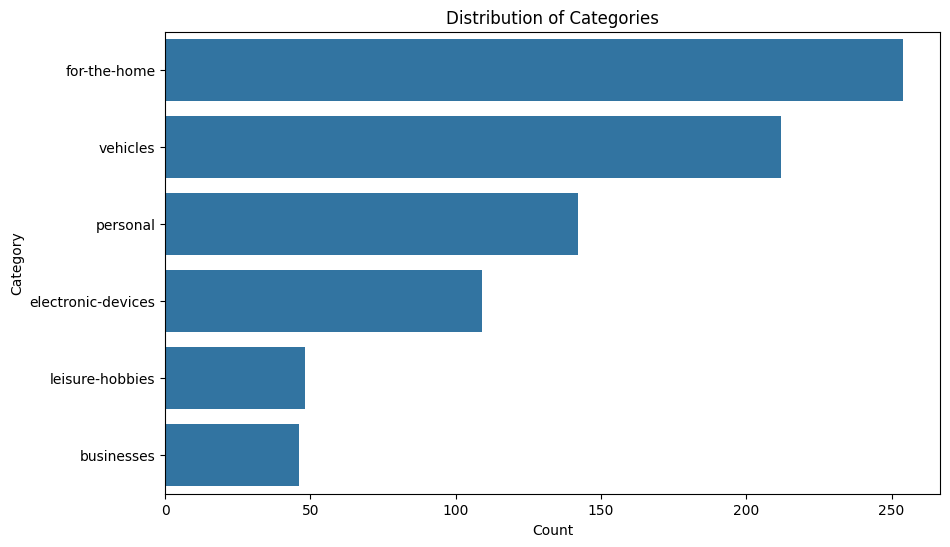

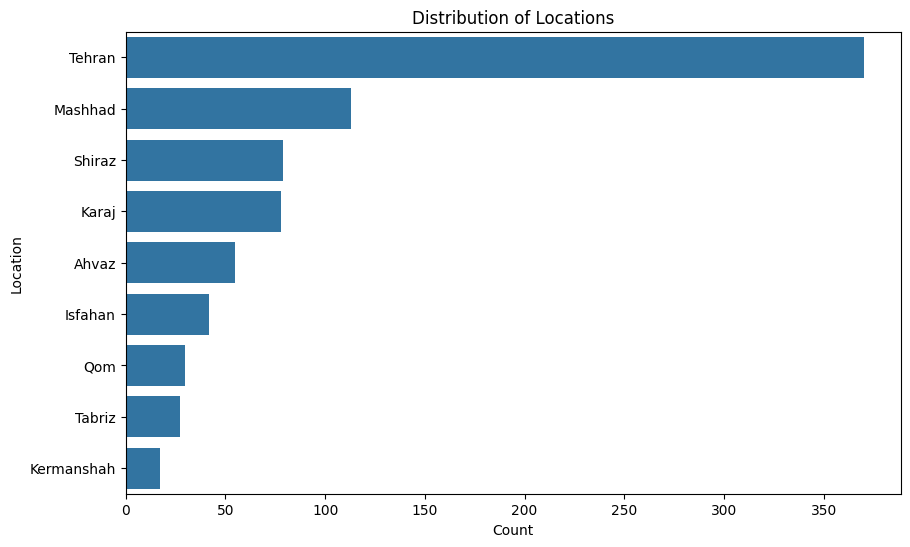

In [5]:
# Univariate Analysis

# Distribution of categories
plt.figure(figsize=(10, 6))
sns.countplot(y='cat1', data=df, order=df['cat1'].value_counts().index)
plt.title("Distribution of Categories")
plt.xlabel("Count")
plt.ylabel("Category")
plt.show()

# Distribution of locations
plt.figure(figsize=(10, 6))
sns.countplot(y='city', data=df, order=df['city'].value_counts().index)
plt.title("Distribution of Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()


<font color = "green"> This cell explores relationships between features. The scatter plot examines the relationship between 'mileage' and 'price' for vehicle posts, while the boxplot shows the distribution of 'price' across different 'cat1' values, highlighting potential outliers and variations.

#<font color="blue" > 4.Exploratory Data Analysis (EDA) – Bivariate Analysis
Examining relationships between features to uncover patterns and correlations.

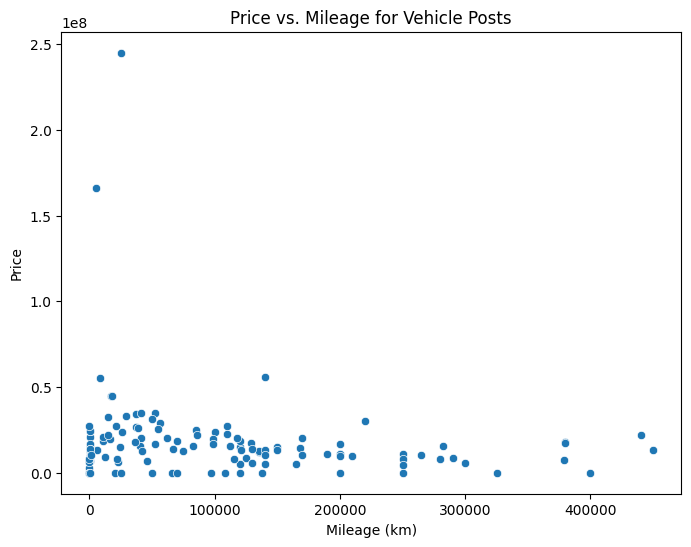

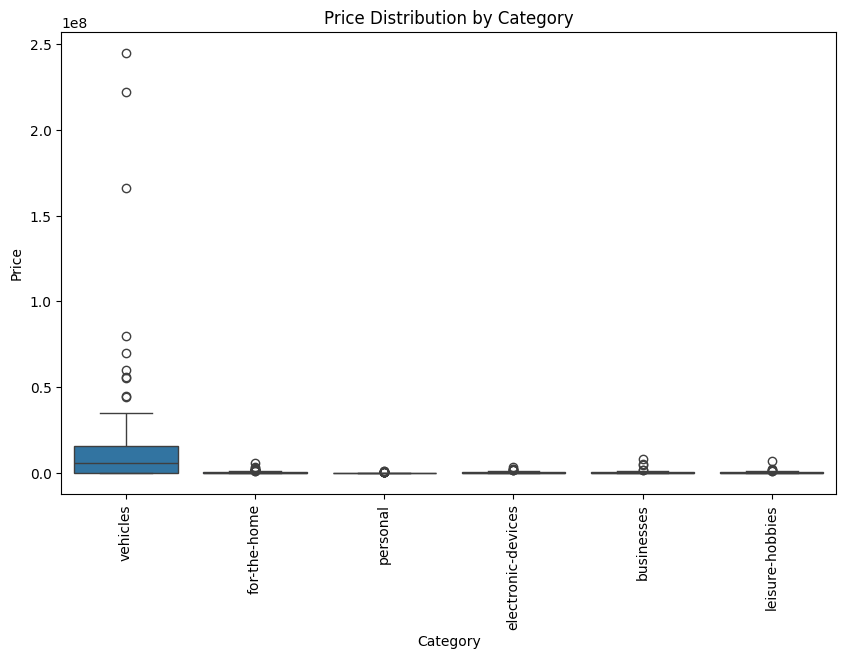

In [6]:
# Bivariate Analysis

# Scatter plot: Price vs. Mileage (for vehicles)
vehicle_df = df[df['cat1'] == 'vehicles']
plt.figure(figsize=(8, 6))
sns.scatterplot(x='mileage', y='price', data=vehicle_df)
plt.title("Price vs. Mileage for Vehicle Posts")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.show()

# Boxplot: Price distribution by category
plt.figure(figsize=(10, 6))
sns.boxplot(x='cat1', y='price', data=df)
plt.title("Price Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Price")
plt.xticks(rotation=90)
plt.show()


<font color="blue"> This cell explores relationships between features. The scatter plot examines the relationship between 'mileage' and 'price' for vehicle posts, while the boxplot shows the distribution of 'price' across different 'cat1' values, highlighting potential outliers and variations.

# <font color = "blue"> 5.Data Cleaning
handling missing values, duplicates, and any invalid data entries

In [7]:
# Data Cleaning

# Check for missing values before cleaning
print("Missing values before cleaning:")
print(df.isnull().sum())

# Handling Missing Values
# Fill missing 'price' values with the median price
df['price'] = df['price'].fillna(df['price'].median())

# Drop rows where 'cat1' or 'city' is missing
df = df.dropna(subset=['cat1', 'city'])

# Drop duplicate rows
print("\nNumber of duplicate rows before cleaning:", df.duplicated().sum())
df = df.drop_duplicates()
print("Number of duplicate rows after cleaning:", df.duplicated().sum())

# Verify missing values after cleaning
print("\nMissing values after cleaning:")
print(df.isnull().sum())


Missing values before cleaning:
Unnamed: 0            0
archive_by_user    1122
brand              1774
cat1               1124
cat2               1127
cat3               1286
city               1124
created_at         1124
desc               1124
id                 1124
image_count        1124
mileage            1814
platform           1124
price              1124
title              1124
type               1841
year               1814
dtype: int64

Number of duplicate rows before cleaning: 0
Number of duplicate rows after cleaning: 0

Missing values after cleaning:
Unnamed: 0           0
archive_by_user      0
brand              650
cat1                 0
cat2                 3
cat3               162
city                 0
created_at           0
desc                 0
id                   0
image_count          0
mileage            690
platform             0
price                0
title                0
type               717
year               690
dtype: int64


<font color = "green"> This cell handles missing values by filling missing 'price' entries with the median price and dropping rows where 'cat1' or 'city' are missing. It also removes duplicate rows to ensure data integrity.

# <font color="blue">6.Data Preprocessing – Converting to Numerical Values
Convert categorical features to numerical formats for analysis.

In [8]:
# Data Preprocessing

# Encode 'cat1' using LabelEncoder
le = LabelEncoder()
df['cat1_encoded'] = le.fit_transform(df['cat1'])

# One-hot encode the 'city' column
df = pd.get_dummies(df, columns=['city'], drop_first=True)

# Drop original 'cat1' and 'city' columns
df = df.drop(columns=['cat1'])

# Display a sample of the dataset after preprocessing
print("Data after preprocessing:")
print(df.head())


Data after preprocessing:
  Unnamed: 0 archive_by_user brand                       cat2           cat3  \
5          2           False   NaN                       cars          heavy   
6          3           False   NaN  furniture-and-home-decore  sofa-armchair   
7          4           False   NaN              baby-and-toys  personal-toys   
8          5           False   NaN  furniture-and-home-decore  sofa-armchair   
9          6           False   NaN          parts-accessories            NaN   

     created_at                                               desc  \
5  Tuesday 07PM  سریال 43j$NUMبدون شکستگی سه حلقه لاستیک نو یک ...   
6  Tuesday 07PM  مبل راحتی هفت نفره شامل سه نفره یک عدد دونفره ...   
7  Tuesday 08PM  شارژی کنترلی سویچ حمل تا 35 کیلو صندلی برای دو...   
8  Tuesday 09PM  بسیارتمیزوسالم وچوب راش فقط به علت جابه جایی و...   
9  Tuesday 10PM            خازن ۳۰ فاراد . Q.PERTORS . تمیز 20 ولت   

             id  image_count  mileage  ... year  cat1_encoded city_Isfah

<font color = "green"> This cell converts categorical variables into numerical formats. The 'cat1' column is label-encoded, and the 'city' column is one-hot encoded. The original categorical columns are then dropped to avoid redundancy.

# <font color = "blue"> 7.Data Normalization/Standardization
Apply normalization or standardization to scale numerical features.

In [9]:
# Data Normalization/Standardization

# Use StandardScaler to standardize numerical features
scaler = StandardScaler()

# Standardize 'price' and 'mileage'
df[['price', 'mileage']] = scaler.fit_transform(df[['price', 'mileage']])

# Verify the changes with a summary statistic
print("Summary after scaling:")
print(df[['price', 'mileage']].describe())


Summary after scaling:
              price       mileage
count  8.110000e+02  1.210000e+02
mean   1.095165e-17 -2.202095e-17
std    1.000617e+00  1.004158e+00
min   -2.414349e-01 -9.703869e-01
25%   -2.394438e-01 -8.120370e-01
50%   -2.301521e-01 -3.183581e-01
75%   -1.883395e-01  3.336707e-01
max    1.601903e+01  3.221227e+00


<font color = "green "> This cell standardizes the 'price' and 'mileage' columns using StandardScaler, ensuring that these features have a mean of 0 and a standard deviation of 1, which is important for many analytical methods and machine learning algorithms.

# <font color = "blue">  8.Final Overview and Notebook Check

In [10]:
# Final overview and sanity check

print("Final dataset shape:", df.shape)
print("Columns in final dataset:", df.columns)
print("\nA sample of the final processed data:")
print(df.head())


Final dataset shape: (811, 24)
Columns in final dataset: Index(['Unnamed: 0', 'archive_by_user', 'brand', 'cat2', 'cat3', 'created_at',
       'desc', 'id', 'image_count', 'mileage', 'platform', 'price', 'title',
       'type', 'year', 'cat1_encoded', 'city_Isfahan', 'city_Karaj',
       'city_Kermanshah', 'city_Mashhad', 'city_Qom', 'city_Shiraz',
       'city_Tabriz', 'city_Tehran'],
      dtype='object')

A sample of the final processed data:
  Unnamed: 0 archive_by_user brand                       cat2           cat3  \
5          2           False   NaN                       cars          heavy   
6          3           False   NaN  furniture-and-home-decore  sofa-armchair   
7          4           False   NaN              baby-and-toys  personal-toys   
8          5           False   NaN  furniture-and-home-decore  sofa-armchair   
9          6           False   NaN          parts-accessories            NaN   

     created_at                                               desc  \

<font color = "green"> This final cell prints the shape, columns, and a sample of the processed dataset. It serves as a final verification step to ensure that all previous cells have executed without errors and that the dataset is now clean, preprocessed, and standardized.